<a href="https://colab.research.google.com/github/abstruse020/musicMan/blob/master/Copy_of_musicMan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.nn.parallel
import matplotlib.pyplot as plt

In [0]:
triplets_file='https://static.turi.com/datasets/millionsong/10000.txt'
songs_metadata_file = 'https://static.turi.com/datasets/millionsong/song_data.csv'

In [3]:
song_df_1 = pd.read_table(triplets_file,header=None)
song_df_1.columns = ['user_id', 'song_id', 'listen_count']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.


In [4]:
song_df_1.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1


In [0]:

song_df_2 =  pd.read_csv(songs_metadata_file)

song_df = pd.merge(song_df_1, song_df_2.drop_duplicates(['song_id']), on="song_id", how="left")

In [6]:
song_df.head()

,user_id,song_id,listen_count,title,release,artist_name,year
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1,The Cove,Thicker Than Water,Jack Johnson,0
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2,Entre Dos Aguas,Flamenco Para Niños,Paco De Lucia,1976
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1,Stronger,Graduation,Kanye West,2007
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1,Constellations,In Between Dreams,Jack Johnson,2005
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1,Learn To Fly,There Is Nothing Left To Lose,Foo Fighters,1999


In [7]:
print(song_df.shape)

(2000000, 7)


selecting a subset of main data

In [32]:
songs_data = song_df.iloc[:100000,:3]
#songs_data.head()
songs_data.shape

(100000, 3)

#spliting the data

In [0]:
#songs_data_train, songs_data_test, _, _ = train_test_split(songs_data,songs_data[:,0],test_size =0.20, random_state = 1)

In [0]:
#songs_data_test.head()
#print(songs_data_test.size,songs_data_train.size)

In [0]:
grouped_songs = songs_data.groupby('user_id')

In [0]:
no_users=0
users = []
for key,data in grouped_songs:
  #print("Key ",key)
  #print("\nData ",data)
  no_users+=1
  users.append(key)

In [37]:
print(no_users,users)

3863 ['0007c0e74728ca9ef0fe4eb7f75732e8026a278b', '000ebc858861aca26bac9b49f650ed424cf882fc', '00342a0cdf56a45465f09a39040a5bc25b7d0046', '0039bd8483d578997718cdc0bf6c7c88b679f488', '00498f4bab2bfeb17680113c7d9525ad5b0ad401', '006edf2afa5cba7e65ccc97892021a129d7012dd', '0085231435fa2ec76642d0ad79070239fa023347', '009fab78deabfd28481ce0123f5a9894c094d971', '00a443baf550f4bbdd974ba73720abf2759166f3', '00ab8753e09a9a0badbeb44a2433f28a4d305812', '00d818febdf653ba58391a780316057e59458ba1', '00e69873b5051f2212e6c52c213a1e1475e63041', '00ed3067d23bf3417800a2135748d91887848dd9', '00f09427308b2cfe93499bc96f6d2f2f7c65bbf7', '00f1665d61b32adb09495c2d0ab3e2de4cb424fb', '00f51c1ca1385bbfd80de6fe313936e69cde7f41', '00f8dc30794f9a22a041e8acf89b6ee1d3fdfc6e', '01388705af361a3ded407ef2aa51fde175a73f64', '013b05f19d72d665b37026b8e5ff6d19a4b9d0b9', '013f01fd2eefeb83e54581a7ea05b0eb951ac799', '0152fcbd02b172a874c75a57a913f0f0109ba272', '01655ae6bc52e29c9cd100a7dde4e9eeae5e4031', '0178637696e00cbf86d7d8b5f

collecting songs
making a list of songs

In [38]:
grouped_songs_2 = songs_data.groupby('song_id')
grouped_songs_2.head()

,user_id,song_id,listen_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBXHDL12A81C204C0,1
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBYHAJ12A6701BF1D,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODACBL12A8C13C273,1
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODDNQT12A6D4F5F7E,5
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SODXRTY12AB0180F3B,1
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFGUAY12AB017B0A8,1
8,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOFRQTD12A81C233C0,1
9,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOHQWYZ12A6D4FA701,1


In [0]:
no_songs = 0
songs = []
for key,data in grouped_songs_2:
  #print('key',key)
  #print('\ndata',data)
  no_songs+=1
  songs.append(key)
#songs = set(songs)

In [40]:
print(no_songs,len(songs))

9938 9938


In [41]:
print(songs)

['SOAAAGQ12A8C1420C8', 'SOAACPJ12A81C21360', 'SOAACSG12AB018DC80', 'SOAAEJI12AB0188AB5', 'SOAAFAC12A67ADF7EB', 'SOAAFYH12A8C13717A', 'SOAAJMQ12A6D4F7D17', 'SOAAKPM12A58A77210', 'SOAALWN12A6D4F7FDA', 'SOAAMOW12AB018149B', 'SOAAOYI12AB01831CE', 'SOAAROC12A6D4FA420', 'SOAARXR12A8C133D15', 'SOAATHE12A8C13ADD6', 'SOAATLI12A8C13E319', 'SOAAUKC12AB017F868', 'SOAAVUV12AB0186646', 'SOAAWEE12A6D4FBEC8', 'SOABGOB12A6701D1FA', 'SOABHNP12A8AE46E82', 'SOABHYV12A6D4F6D0F', 'SOABJBU12A8C13F63F', 'SOABJTC12A58A7DE0E', 'SOABNLP12A6D4F87F4', 'SOABNPW12A6D4FC9B5', 'SOABOHM12AB018509C', 'SOABOXV12AC3DF82F7', 'SOABPQU12A58A78441', 'SOABQTG12A6701F3DB', 'SOABRAB12A6D4F7AAF', 'SOABTTR12A6D4FC2EB', 'SOABXNE12A8C13B818', 'SOACBLB12AB01871C7', 'SOACDMD12A67AD8332', 'SOACERJ12A67AD865E', 'SOACGVR12A8C13B60A', 'SOACIPG12A8AE47E1C', 'SOACKIA12A6D4F73D7', 'SOACMJJ12A6D4FC66A', 'SOACNQJ12A8C13B09E', 'SOACPBY12A8C13FEF9', 'SOACPSU12A81C231EF', 'SOACRBY12AB017C757', 'SOACXET12AB01852E3', 'SOACYKU12A5891CC64', 'SOACYUL1

#Making 2d list

In [0]:
def convert(data):
  new_data=[]
  for id_user in users:
    id_songs = data.iloc[:,1][data.iloc[:,0]==id_user]
    #print(id_songs.head())
    id_ratings = data.iloc[:,2][data.iloc[:,0]==id_user]
    #print(id_ratings.head())
    ratings = np.zeros(no_songs)
    if(id_songs.empty==False):
      for sid,rat in zip(id_songs,id_ratings):
        #print(sid)
        indx=songs.index(str(sid))
        ratings[indx] = rat
      new_data.append(list(ratings))
  return new_data

In [0]:
train_set = convert(songs_data)
#test_set = convert(songs_data_test) make test data by train test split

# convert to torch tnsors

In [0]:
training_set = torch.FloatTensor(train_set)
#test_set = torch.FloatTensor(test_set)


#Convert training set (not herd to -1)

In [45]:
training_set[training_set == 0] ==-1
training_set[training_set == 1] ==0
training_set[training_set == 2] ==0
training_set[training_set > 2] ==1

tensor([0, 0, 0,  ..., 0, 0, 0], dtype=torch.uint8)

#RBM class

In [0]:
class RBM():
  def __init__(self,nv,nh):
    self.W = torch.randn(nh,nv)
    self.a = torch.randn(1,nh)
    self.b = torch.randn(1,nv)
  def sample_h(self,x):
    wx = torch.mm(x,self.W.t())
    activation = wx + self.a.expand_as(wx)
    p_h_given_v = torch.sigmoid(activation)
    return p_h_given_v, torch.bernoulli(p_h_given_v)
  def sample_v(self,y):
    wy = torch.mm(y,self.W)
    activation = wy + self.b.expand_as(wy)
    p_v_given_h = torch.sigmoid(activation)
    return p_v_given_h, torch.bernoulli(p_v_given_h)
  def train(self, v0,vk,ph0,phk):
    self.W += (torch.mm(v0.t(),ph0) - torch.mm(vk.t(),phk)).t()
    self.b += torch.sum((v0 - vk), 0)
    self.a += torch.sum((ph0 - phk), 0)
    

In [0]:
nv = no_songs
nh  = 150
batch_size = 128
rbm = RBM(nv,nh)

#Training the model

In [48]:
nb_epoch =10
for epoch in range(1,nb_epoch + 1):
  train_loss =0
  s=0.
  for id_user in range(0,no_users-batch_size,batch_size):
    vk=v0=training_set[id_user:id_user+batch_size]
    ph0,_ = rbm.sample_h(v0)
    for k in range(10): #k step contrastive divergence
      _,hk = rbm.sample_h(vk)
      _,vk = rbm.sample_v(hk)
      vk[v0<0] = v0[v0<0]
    phk,_ = rbm.sample_h(vk)
    rbm.train(v0,vk,ph0,phk)
    train_loss += torch.mean( torch.abs( v0[v0>=0] - vk[v0>=0] ) )
    s +=1.
  print('epoch: '+str(epoch) + ' loss ' + str(train_loss/s))

epoch: 1 loss tensor(0.0335)
epoch: 2 loss tensor(0.0134)
epoch: 3 loss tensor(0.0142)
epoch: 4 loss tensor(0.0141)
epoch: 5 loss tensor(0.0148)
epoch: 6 loss tensor(0.0151)
epoch: 7 loss tensor(0.0144)
epoch: 8 loss tensor(0.0153)
epoch: 9 loss tensor(0.0155)
epoch: 10 loss tensor(0.0149)


#Testing the model

<function matplotlib.pyplot.show>

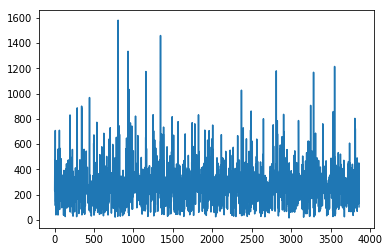

In [49]:
predictions = []
s = 0.
for id_user in range(no_users):
  v = training_set[id_user:id_user + 1]
  vt = training_set[id_user:id_user+1]
  if len(vt[vt>=0]) > 0:
    _,h = rbm.sample_h(v)
    _,v = rbm.sample_v(h)
    pred_id = torch.sum(torch.abs(vt-v))
    predictions.append(pred_id)
    #test_loss += torch.mean(torch.abs(vt[vt>=0] - v[vt>=0]))
    #s += 1.
#print('test loss: ' + str(test_loss/s))
plt.plot(predictions)
plt.show
